## DATA WRANGLING AND FEATURE ANALYSIS

In [11]:
# Analyse the data, data points and Features
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

#Understanding the data
dictionary = pd.read_excel('Data/neis-data-dictionary_terms.xlsx')
main       = pd.read_excel("Data/neisdatagovhack_Main.xlsx")
dict_df = pd.DataFrame.from_dict(dictionary, orient='columns', dtype=None)
main_df = pd.DataFrame.from_dict(main, orient='columns', dtype=None)
print(main_df.info())
print(main_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53646 entries, 0 to 53645
Data columns (total 38 columns):
business_id           53646 non-null int64
start_date            53646 non-null datetime64[ns]
end_date              53646 non-null datetime64[ns]
neis_type             53646 non-null object
exit_reason           53599 non-null object
successful            53646 non-null object
anzsic_code           53596 non-null float64
industry_type         53646 non-null object
state                 53646 non-null object
metro                 53646 non-null int64
age_group             53646 non-null object
gender_cd             53646 non-null object
indigenous_ind        53646 non-null object
ex_offender_ind       53646 non-null object
nesb_ind              53646 non-null object
refugee_ind           53646 non-null object
disability_ind        53646 non-null object
homeless_ind          53646 non-null object
sole_parent_ind       53646 non-null object
neis_allowance_ind    53646 non-null obj

### Analyse the feature information present in Data Dictionary excel
Data Dictionary excel provides information about what columns/features are present in the main excel workbook. 
This excel content is transferred into a dataframe for further analysis.

Besides the description of the features, this excel contains "Data type", "Unique values of different features" etc.

In [12]:
#columns and study the data in it
dict_df.columns = ['var_name','var_descr','var_coding','var_categ','notes']
print(dict_df)

              var_name                                          var_descr  \
0          business_id                 Unique identifier for the business   
1           start_date  The date the NEIS participant entered the NEIS...   
2             end_date  The date the NEIS participant exited the NEIS ...   
3            neis_type  The employment services program in which the b...   
4          exit_reason  The reason for which the NEIS participant exit...   
5           successful  Indicates whether the NEIS participant success...   
6          anzsic_code                 The industry code for the business   
7        industry_type       The broad industry category for the business   
8                state             The state or territory of the business   
9                metro  Indicates whether the location of the business...   
10           age_group                  Age group of the NEIS participant   
11           gender_cd              Sex indicator of the NEIS participant   

### Dataset of the Features
Based on the data points present in the Main Excel i.e. Some of the columns are missing values (NAN), which makes
these columns difficult to be considered for analysing the target. There are 53,000+ records in total and Columns 
having atleast 10K+ records are listed below.


(1) business_id 
(2) start_date
(3) end_date
(4) exit_reason
(5) successful
(6) industry_type
(7) state
(8) metro
(9) age_group
(10) gender_cd

Apart from the above columns, we have some indicators that denote the personality type/ community of a person.
Rather than considering multiple indicator columns, we will add one column "Personality_type" to the dataframe and
that will explain the personality/community type of a business owner

(11) Personality_type

#### Features that need imputation to handle the NAN records
The non-categorical column 'SV_HOURS_WORK' seems to have 8K records. Let's plot a histogram to analyse the range of
values before deciding on the method of imputation.

# Uniqueness and Characteristics of Columns/Features
Let us observe the characteritics and metadata of features discussed above:
    
    business_id         : Unique identifier for the business.
    
    start_date, end_date: The date NEIS Participant entered / exited the program.
        
    neis_type           : Employment services program the business was started under.
                          This feature can have 2 unique values i.e. NEI4 and NEI5
    
    exit_reason         : The reason for which the NEIS participant exited the program.
                          This Categorical feature can hold 2 values: 'Y'(successful completion), 'N'(not successful)
    anzsic_code         : This is the industry code for business. This feature may not be very useful in analysis/ 
                          may not influence the target
            
    state               : The state or territory of the business. This categorical feature can hold 7 values.
                          i.e. NSW, QLD, VIC, WA, ACT, NT, TAS
    metro               : This categorical features can hold 2 values i.e. 1- Metro and 0- regional        
    gender_cd           : Sex indicator of NEIS participant having 2 unique values i.e. M,F 
    age_group           : Participants in this program belong to one of 10 age groups. So this is a categorical 
                          feature.
                          
    industry_type       : Participants in this program belong to one of 17 industries. So this is a categorical 
                          feature.               
                            

### Numerical categorical features:

Although the below categorical features have very less non-Nan records, these are categorical features
that can hold whole values. Details are given below:
    
    sv_end_train  - indicates whether NEIS business ended due to poor quality training
                        Has 4 options - .,1 - No,2 - yes a little,3 -yes a lot

    sv_end_mentor - Indicates whether NEIS business ended due to poor quality mentoring support
                    same options as above

    sv_end_profit - Indicates whether NEIS business ended due to insufficient profit.
                    same options as above

    sv_end_dem    - Indicates whether NEIS business ended due to lack of market demand.
                    same options as above

    sv_end_loc    - Indicates whether the business ended due to poor location
                    same options as above

    sv_end_health - Indicates whether the business ended due to poor health
                    same options as above

    sv_end_oth    -  Indicates whether the business ended due to other reasons
                    same options as above

    sv_sat_bus_train - Level of satisfaction with the small business management training received
                    Options are: . - No response, 1 - Very dissatisfied, 2 - dissatisfied, 3- Neutral 
                                4- satisfied, 5 - very satisfied


    sv_sat_mentor - Level of satisfaction with the quality of mentoring. same options as above

    sv_sat_tailor_sup - Level of satisfaction with the tailoring of support to the job seeker’s needs.
                    same options as above

    sv_sat_overall - Overall Level of Satisfaction. Same options as above.
    
    
### The above numerical, categorical features has very less numerical records - More than 80% of records in these features have NAN. So we need to perform imputation on these features.

#### As a first step, we will replace the . in these features with the value 0 - Survey not completed.
#### Secondly, Data imputation is performed on these columns by replacing NAN with 0 (Survey not completed)

In [13]:
#main_df['sv_end_train','sv_end_mentor','sv_end_profit','sv_end_dem','sv_end_loc','sv_end_health','sv_end_oth','sv_sat_bus_train','sv_sat_mentor','sv_sat_tailor_sup','sv_sat_overall'].replace(regex='.', value=0).
    
main_df['sv_end_train'] = main_df['sv_end_train'].replace(regex='.', value=0)


#main_df['sv_end_train'] = pd.get_dummies(main_df['sv_end_train'])

#main_df['sv_end_mentor'] = pd.get_dummies(main_df['sv_end_mentor'])
#main_df['sv_end_profit'] = pd.get_dummies(main_df['sv_end_profit'])
#main_df['sv_sat_bus_train'] = pd.get_dummies(main_df['sv_sat_bus_train'])

main_df[['sv_end_train','sv_end_mentor','sv_sat_bus_train','sv_end_profit']].describe()

,sv_end_train,sv_end_mentor,sv_sat_bus_train,sv_end_profit
count,3049.000000,3075.000000,10700.000000,3227.000000
mean,1.296491,1.386992,4.081682,2.335606
std,0.598547,0.684782,1.177991,0.821582
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,4.000000,2.000000
50%,1.000000,1.000000,4.000000,3.000000
75%,1.000000,2.000000,5.000000,3.000000
max,3.000000,3.000000,5.000000,3.000000


Even If we attempt to populate the categorical features with values such as 2 or 3, we are really not sure whether the reason gives an indication of why the business has ended. 

Therefore, listed below are the consolidated list of features that we will be using for further analysis:
    
    (1) business_id 
    (2) exit_reason 
    (3) successful  --> TARGET
    (4) industry_type 
    (5) state 
    (6) metro 
    (7) age_group 
    (8) gender_cd
    (9) personality_type ---> Will be constructed in below sections
    (10) sv_hours_work --> will be analysed in the later sections

### Influence of Age Group on "Success"

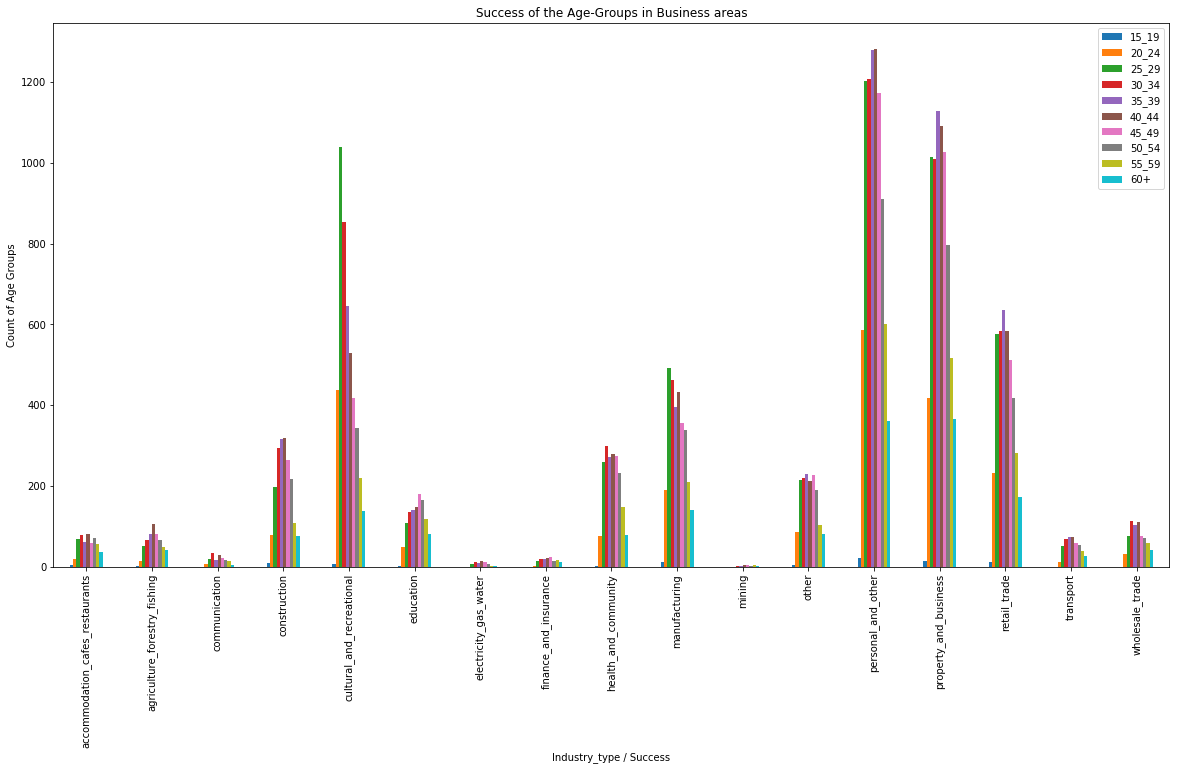

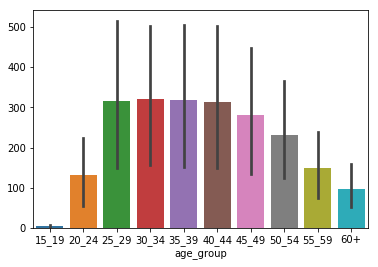

In [14]:
# prepare a pivot table to display the number of successes/failure businesses among different age groups
main_df['Age'] = main_df['age_group']


main_pivot2 = main_df[main_df['successful']=='Y'].pivot_table(values='Age', index=['industry_type'], columns='age_group', aggfunc='count',fill_value=0, dropna = True, margins_name='All')
main_pivot2.plot.bar(rot=90,figsize=(20,10)).legend(loc='upper right')
plt.xlabel('Industry_type / Success')
plt.ylabel('Count of Age Groups')
plt.title('Success of the Age-Groups in Business areas')
plt.show()

sns.barplot(data=main_pivot2);

On analysing the above Bar chart, below deductions could be made:
    
    1) Age groups between 25 to 45 are relatively more successfull than those of other age groups
    
    2) The above age groups are very successfull in the industry types 'Property_and_business' and 'personal_and_other'
    
    3) All the age groups were least or not so successfull in industry types 'mining'

#### Influence of State on Success of the participant

                                           State                            \
StateVal                                     ACT   NSW  NT   QLD   SA  TAS   
industry_type                   successful                                   
accommodation_cafes_restaurants N              3   101   0    42   18   14   
                                Y              4   174   1    75   56   33   
agriculture_forestry_fishing    N              0    82   0    51   11    6   
                                Y              3   202   2   109   40   24   
communication                   N              0    43   0    19    7    0   
                                Y              1    54   0    38   14    1   
construction                    N              8   207   2   159   34   24   
                                Y             15   500   7   408  121   58   
cultural_and_recreational       N             28   616   3   326  146   46   
                                Y             50  1447  17   829

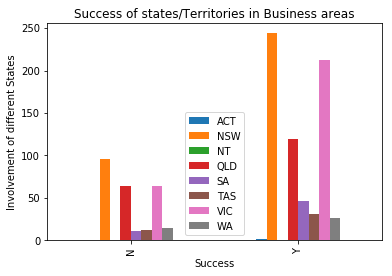

In [15]:
# prepare a pivot table to display the number of successes/failure businesses among different States
main_melt2 = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['state'],var_name='State',value_name='StateVal')
# Replace N/A values with 0 in the columns of pivot table
main_pivot2 = main_melt2.pivot_table(values=None, index=['industry_type','successful'], columns='StateVal', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print(main_pivot2)
industries = main_pivot2.index.get_level_values(0).unique()
for industry in industries:
    split = main_pivot2.xs(industry)
    state = split["State"]

# plot a bar chart to check which States/Territories are getting involved in what businesses and how 
# successful they are..
state.plot(kind="bar").legend(loc='lower center')
plt.xlabel('Success')
plt.ylabel('Involvement of different States')
plt.title('Success of states/Territories in Business areas')
plt.show()

On analysing the above bar chart, we could find that:
    1) NSW, QLD and VIC have the most number of participants in this program.
    2) NSW appears to have a high success rate when compared to the other states.

                      industry_type  success_percent
0   accommodation_cafes_restaurants        68.992248
1      agriculture_forestry_fishing        71.465296
2                     communication        60.299625
3                      construction        73.195474
4         cultural_and_recreational        72.897638
5                         education        69.060773
6             electricity_gas_water        81.578947
7             finance_and_insurance        64.220183
8              health_and_community        70.685841
9                     manufacturing        68.053058
10                           mining        62.500000
11                            other        64.883914
12               personal_and_other        67.312046
13            property_and_business        67.781043
14                     retail_trade        65.367047
15                        transport        72.364217
16                  wholesale_trade        72.292994


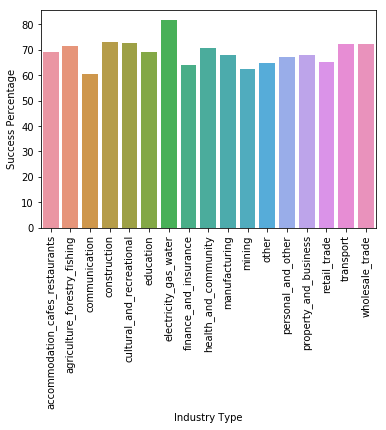

In [16]:
########################################################################################################
# Calculating the 'Success percent' per industry type and plotting a bar chart 
# to analyse the trends
########################################################################################################
def convert_success(x):
    if "Y" in x:
        return 1
    elif "N" in x:
        return 0
    else: return 0

main_df["success_indicator"] = main_df["successful"].apply(convert_success)
# Calculate the "success percent per industry type"
industry_df = main_df.groupby(['industry_type'])['success_indicator'].agg(
                             [('success_percent', lambda success_indicator: 100* ((success_indicator > 0).sum()) / len(success_indicator))])
industry_df.reset_index(inplace=True)
print(industry_df.head(20))

sns.barplot(x="industry_type", y="success_percent", data=industry_df);
plt.xticks(rotation=90)
# Label axes
plt.ylabel('Success Percentage')
plt.xlabel('Industry Type')       
plt.show()

As per the Bar Chart shown above, we can make the following assumptions:
    
    1) Only one industry "Electricity, gas and water" stands out in success rate among all of the industry types.
    Only this indusry type has a success percentage of more than 80%
    
    2) Among the industry types, only the communication industry has the lowest "Success Percentage" of 60%
    
    3) There are 6 industry_types that have a succes rate ranging between 70% and 80%
    
Industry type could be an important indicator while screening candidates wishing to participate in this program.

### Analyse and compare the histograms by including all the features to deduce any meaningul results

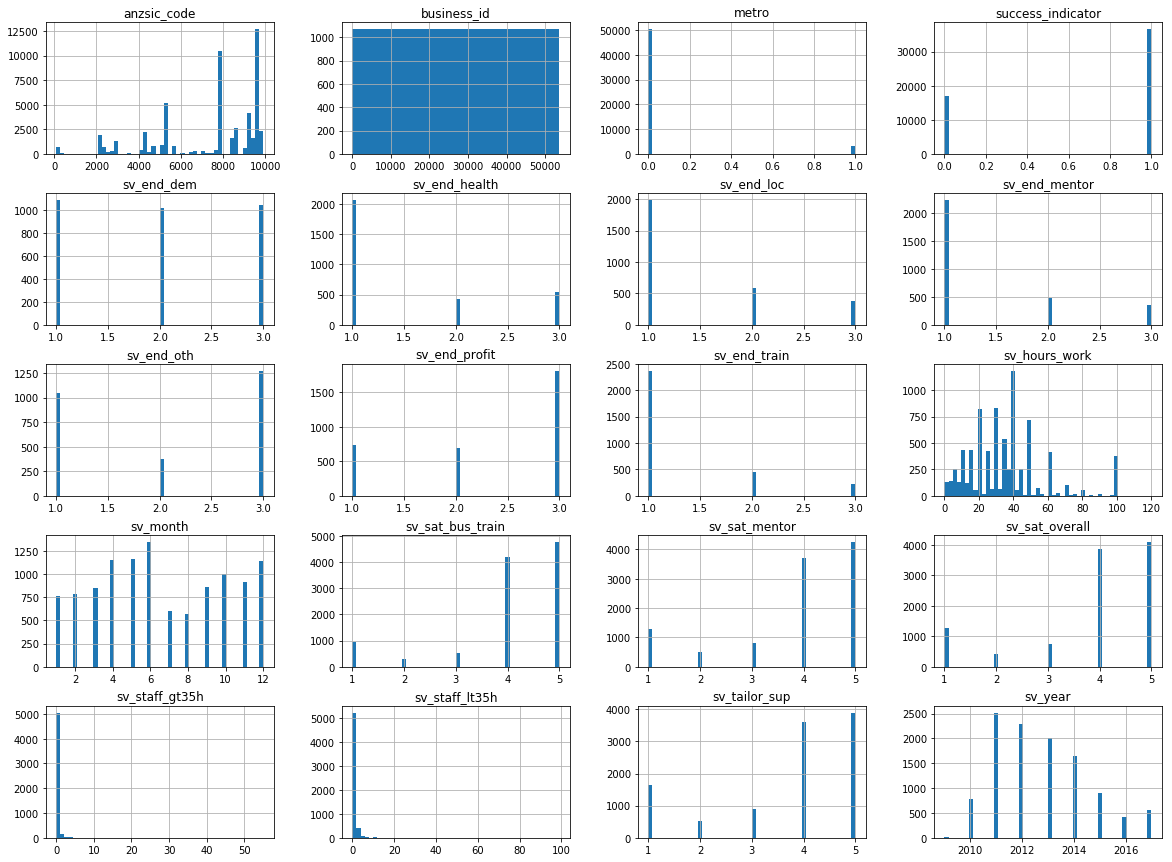

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

main_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

#### Bar chart Analysis:

1)  As per the above charts and stats listed in previous cells, non-categorical feature "SV_HOURS_WORK" has a mean of 35 and it has 80% of NAN values. We can replace the missing (NAN) values with 35.

2) Enlarge the barcharts of the non-categorical features 'sv_staff_gt35h' and 'sv_staff_lt35h' and check if we can notice any trends.

In [18]:
# Replace Nan/ missing values in the feature 'SV_HOURS_WORK' with the mean value of the non-NAN values.
main_df.sv_hours_work = main_df.sv_hours_work.fillna(main_df.sv_hours_work.mean())
main_df.describe()

,business_id,anzsic_code,metro,sv_month,sv_year,sv_hours_work,sv_staff_lt35h,sv_staff_gt35h,sv_end_train,sv_end_mentor,sv_end_profit,sv_end_dem,sv_end_loc,sv_end_health,sv_end_oth,sv_sat_bus_train,sv_sat_mentor,sv_tailor_sup,sv_sat_overall,success_indicator
count,53646.000000,53596.000000,53646.000000,11147.000000,11147.000000,53646.000000,5803.000000,5296.000000,3049.000000,3075.000000,3227.000000,3144.000000,2969.000000,3044.000000,2699.000000,10700.000000,10593.000000,10582.000000,10408.000000,53646.000000
mean,26827.169258,7423.195780,0.058308,6.606262,2012.755898,35.280449,0.558849,0.405778,1.296491,1.386992,2.335606,1.986323,1.458404,1.499671,2.086328,4.081682,3.864628,3.716689,3.877786,0.685046
std,15488.324811,2428.965571,0.234327,3.435323,1.818195,8.513877,2.007426,2.342488,0.598547,0.684782,0.821582,0.823689,0.712119,0.781607,0.923077,1.177991,1.325153,1.404108,1.305337,0.464502
min,1.000000,100.000000,0.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,13414.250000,5259.000000,0.000000,4.000000,2011.000000,35.280449,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.000000,0.000000
50%,26827.500000,7869.000000,0.000000,6.000000,2012.000000,35.280449,0.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,1.000000
75%,40239.750000,9525.000000,0.000000,10.000000,2014.000000,35.280449,1.000000,0.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,1.000000
max,53654.000000,9901.000000,1.000000,12.000000,2017.000000,120.000000,99.000000,55.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,1.000000


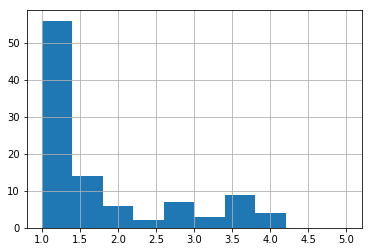

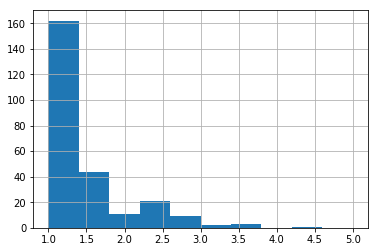

In [17]:
# Converting the 2 features "Staff working > 35 hrs" and "Staff working < 35 hrs" to log scale as they appear a bit
# skewed.
main_log = main_df [['sv_staff_gt35h','sv_staff_lt35h']]
main_log["sv_staff_gt35h"].apply(np.log).hist(range={1,5})
plt.show()

main_log["sv_staff_lt35h"].apply(np.log).hist(range={1,5})
plt.show()

 Above histograms indicate that most of the particiants have very less employees working for more than 35 hours 
 and less than 35 hours. i.e. Most of these businesses have the owner as the employee along with a mentor assigned
 by the department.

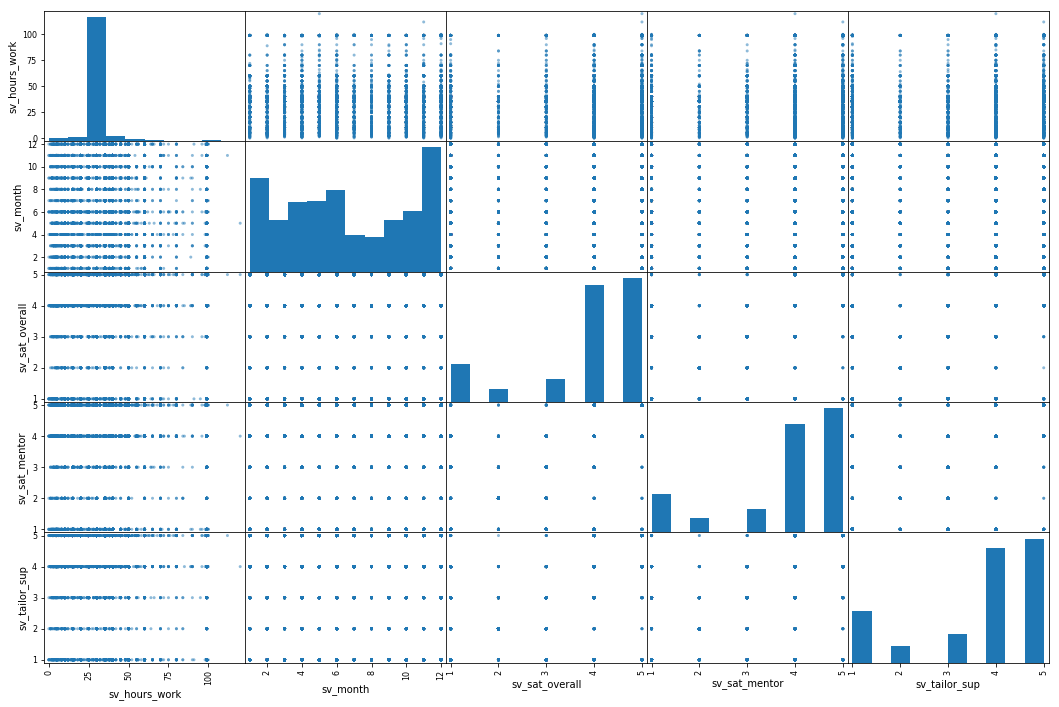

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["sv_hours_work", "sv_month", "sv_sat_overall","sv_sat_mentor","sv_tailor_sup"]
scatter_matrix(main_df[attributes], figsize=(18, 12))
plt.savefig('matrix.png')


#### As per the above scatter matrix, we make deduce that Businesses working for 50-100 hours / week tend to be succesfull (although there are few failures.)

### Analyzing heat maps for a combination of categorical and non-categorical features.

We are planning to use categorical features (such as 'state','metro','age_group','gender_cd','industry_type',
'neis_allowance_ind') and non-categorical features (such as 'sv_hours_work','sv_month',
'sv_sat_bus_train','sv_sat_mentor','sv_sat_overall') to plot heat maps and identify whether we could notice
any trends/ correlation with success

In [20]:
# Representing the gender as NUMBERS i.e. Male: 1 and Female: 0
def convert_gender(x):
    if "M" in x:
        return 1
    elif "F" in x:
        return 0
    else: return 0
    
# Representing the Success_indicators as NUMBERS i.e. SUCCESS - Y: 1 and SUCCESS - N (Failure): 0    
def convert_successful(x):
    if "Y" in x:
        return 1
    elif "N" in x:
        return 0
    else: return 0    

# Some of the columns store text/ Business IDs and they dont make much sense. Therefore, consider numerical columns.
main_model = main_df[['state','metro','age_group','gender_cd','industry_type',
                      'sv_hours_work','sv_month','sv_sat_bus_train',
                      'sv_sat_mentor','sv_sat_overall','neis_allowance_ind','successful']]

# Some of the features in the above dataframe above text/ descriptions and these can be converted to numerical equivalents.
# for Instance, in "gender_cd", male can be represented as 1 and female can be represented as 0   
main_model["success_indicator"] = main_model["successful"].apply(convert_successful)
#main_model["neis_allowance_ind"] = main_model["neis_allowance_ind"].apply(convert_gender) # function for "gender" can be applied here
main_model["gender_cd"] = main_model["gender_cd"].apply(convert_gender)


/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


success_indicator    1.000000
sv_sat_overall       0.107590
sv_sat_mentor        0.105282
sv_sat_bus_train     0.104915
sv_month             0.095281
sv_hours_work        0.021721
gender_cd            0.004557
metro               -0.146570
Name: success_indicator, dtype: float64


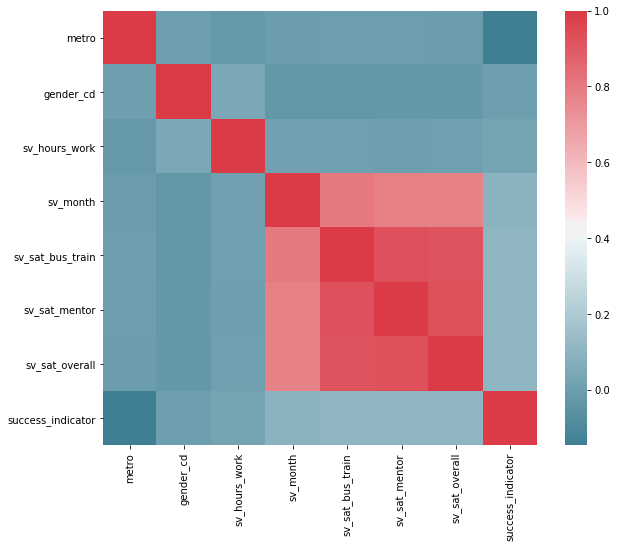

In [21]:
import seaborn as sns
# Finding the positive/negative correlation between the different features and the success indicators
main_model = main_model.fillna(0)
corr_matrix = main_model.corr()
print(corr_matrix["success_indicator"].sort_values(ascending=False))
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### Results from Heat Map:
As per the Correlation results, only certain features are positively correlated such 
as sv_sat_overall, sv_sat_mentor, sv_sat_bus_train and sv_hours_work. 
All other features are either Close to ZERO/ Negatively correlated.
But none of the features appear to be very strongly correlated with the target "SUCCESS INDICATOR"

We haven't considered the different personality types as a feature. It is quite possible that this feature could 
have an influence on the TARGET variable apart from the Industry_type. Therefore, Lets see correlation 
of personality type with the "Success indicator" in the next section.

  personality_type  success_percent
0   NO_PERSONALITY        71.049547
1   disability_ind        64.601147
2  ex_offender_ind        60.255630
3     homeless_ind        69.379451
4   indigenous_ind        57.227891
5         nesb_ind        70.286686
6      refugee_ind        50.000000
7  sole_parent_ind        62.407302


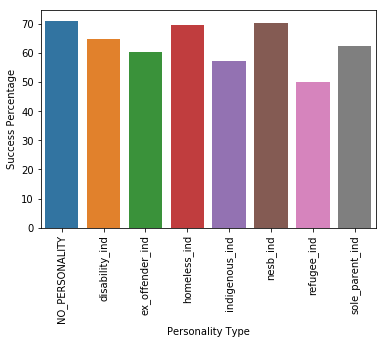

In [22]:
# Check whether the "personality type" has a positive correlation with "Success Indicator"

# Bring all the personality types as a single column in the Data frame.
def identify_personality(x):
    if x['indigenous_ind'] == 'Y':
        return "indigenous_ind"
    elif x['ex_offender_ind'] == 'Y':
        return "ex_offender_ind"
    elif "Y" in x['nesb_ind']:
        return "nesb_ind"
    elif x['refugee_ind'] == 'Y':
        return "refugee_ind"
    elif x['disability_ind'] == 'Y':
        return "disability_ind"
    elif x['homeless_ind'] == 'Y':
        return "homeless_ind"
    elif x['sole_parent_ind'] == 'Y':
        return "sole_parent_ind"
    else:
        return "NO_PERSONALITY"


#we need to find the "Success percentage per community/personality type" and check whether this correlates
# with our target.
main_model['personality_type'] = main_df.apply(lambda row: identify_personality(row),axis=1)
main_model["success_indicator"] = main_df["successful"].apply(convert_successful)

# Aggregate the count of "Successes/personality types"
#personality_df = main_model.groupby(['personality_type','successful'], as_index=False).agg({"success_indicator": "sum"})

# Calculate the "success percent per industry type"
personality_df = main_model.groupby(['personality_type'])['success_indicator'].agg(
                             [('success_percent', lambda success_indicator: 100* ((success_indicator > 0).sum()) / len(success_indicator))])
personality_df.reset_index(inplace=True)
print(personality_df.head(20))

sns.barplot(x="personality_type", y="success_percent", data=personality_df);
plt.xticks(rotation=90)
# Label axes
plt.ylabel('Success Percentage')
plt.xlabel('Personality Type')       
plt.show()

From the above bar chart, it can be understood that:

    1) Businesses started by Refugees are successfull only 50% of the time- Department might have to allocate 
       additional funds / training before allowing the refugee participants to start their own business.
       
    2) Although the Australian government has introduced policies/programs to encourage Aboriginal/indigeneous
       participants, they are 57% successfull, which shows that government will have to undertake additional 
       measures.
       

In [23]:
# It appears that the personality types play an important role in determining the success in Business.
# so, we can add the personality types to the list of other positively "correlated indicators"
#(determined by coorelation matrix)
main_final = main_model[['sv_sat_overall','sv_sat_mentor','sv_sat_bus_train','sv_month','sv_hours_work',
                         'personality_type','industry_type']]
print(main_final.describe())
print(main_final.info())

# We will perform the Statistical inferences and Build Machine learning models in subsequent Python books.

       sv_sat_overall  sv_sat_mentor  sv_sat_bus_train      sv_month  \
count    53646.000000   53646.000000      53646.000000  53646.000000   
mean         0.752339       0.763114          0.814115      1.372703   
std          1.637680       1.647293          1.713762      3.104236   
min          0.000000       0.000000          0.000000      0.000000   
25%          0.000000       0.000000          0.000000      0.000000   
50%          0.000000       0.000000          0.000000      0.000000   
75%          0.000000       0.000000          0.000000      0.000000   
max          5.000000       5.000000          5.000000     12.000000   

       sv_hours_work  
count   53646.000000  
mean       35.280449  
std         8.513877  
min         0.000000  
25%        35.280449  
50%        35.280449  
75%        35.280449  
max       120.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53646 entries, 0 to 53645
Data columns (total 7 columns):
sv_sat_overall      53646 non-null f

### Summary:
Listed below are some of the deductions made:

1) People who dont belong to one of the personality types(i.e. NO_PERSONALITY) are the most successfull in this program

2) sv_sat_overall is the categorical feature that has influence on Target variable(Success_indicator) as per the heat map analysis. Although there were other non-categorical features that had some positive correlation, they have less number of non-NAN records and may not be really helpful

3) Indicators such as sv_staff_lt35h and sv_staff_gt35h  seem to influence the success_indicator apart from other catgorical features industry_type, personality_type, age_group, state etc.